# P-h diagram for R-134a refrigerant

Consider R134-a as a refrigerant fluid. Build the P-h (Pressure vs. Specific Enthalpy) for R134-a knowing the critical pressure is around $4.03\:MPa$. Build three constant temperature curves for $T=120 ^{\circ}  C$, $0\ ^{\circ}  C$ and $-20 ^{\circ}  C$.

# Solution approach:

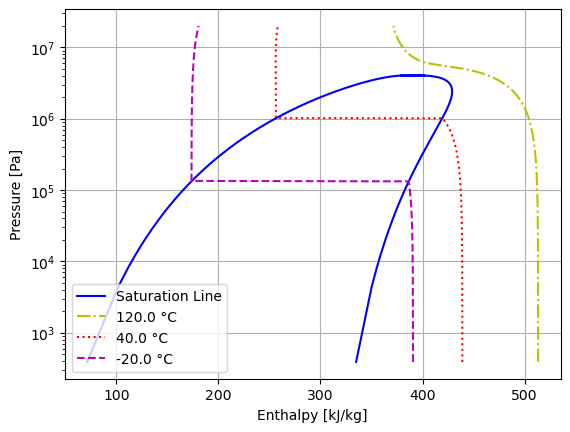

In [1]:
# Plot a P-h diagram for a fluid of choice


# import the libraries we'll need
import CoolProp.CoolProp as CP
import numpy as np
import matplotlib.pyplot as plt


# define variables
fluid = "R134A"  # define the fluid or material of interest, for full list see CP.Fluidslist()
T_min = CP.PropsSI("Tmin", fluid)  # triple-point temp for the fluid
P_min = CP.PropsSI("P", "T", T_min, "Q", 0, fluid)  # triple-point pressure for the fluid
P_max = 4.03E+6 #approximate critical pressure

P_vals = np.linspace(P_min, P_max, 1000)  # define an array of values from P_min to P_max
Q = 1  # define the fluid quality as 1, which is 100% vapor

enthalpy = [CP.PropsSI("H", "P", P, "Q", Q, fluid)/1000 for P in P_vals]  # call for enthalpy values using CoolProp

plt.plot(enthalpy, P_vals, "-b", label="Saturation Line")  # plot pressure vs enthalpy

Q = 0  # define the fluid quality as 0, which is 100% liquid

enthalpy = [CP.PropsSI("H", "P", P, "Q", Q, fluid)/1000 for P in P_vals] # call for enthalpy values using CoolProp

plt.plot(enthalpy, P_vals, "-b")  # plot pressure vs enthalpy


plt.yscale("log")  # use log scale on y axis
plt.ylabel("Pressure [Pa]")  # give y axis a label
plt.xlabel("Enthalpy [kJ/kg]")  # give x axis a label
plt.grid()
plt.legend()

# Building constant temperature curves

T_up = 120 + 273.15
T_mid = 40 + 273.15
T_down = -20 + 273.15

P_max = 20E+6  # max pressure in the plot set to 20MPa
P_vals = np.linspace(P_min, P_max, 10000)  # define an array of values from P_min to P_max
enthalpy_up = [CP.PropsSI("H", "P", P, "T", T_up, fluid)/1000 for P in P_vals] # call for enthalpy values using CoolProp
enthalpy_mid = [CP.PropsSI("H", "P", P, "T", T_mid, fluid)/1000 for P in P_vals] # call for enthalpy values using CoolProp
enthalpy_down = [CP.PropsSI("H", "P", P, "T", T_down, fluid)/1000 for P in P_vals] # call for enthalpy values using CoolProp

plt.plot(enthalpy_up, P_vals, "-.y", label="{} °C".format(T_up-273.15))  # plot pressure vs enthalpy
plt.plot(enthalpy_mid, P_vals, ":r", label="{} °C".format(T_mid-273.15))  # plot pressure vs enthalpy
plt.plot(enthalpy_down, P_vals, "--m", label="{} °C".format(T_down-273.15))  # plot pressure vs enthalpy
plt.legend()